## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [40]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)
pd.options.display.float_format = '{:,.2f}'.format 

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [41]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [42]:
df.shape

(2314, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [43]:
df.count()

DATE     2314
TAG      2314
POSTS    2314
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [44]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,40643
c,381549
c#,1544986
c++,768806
delphi,49727
go,62407
java,1852274
javascript,2391750
perl,66854


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [45]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,167,167
c,167,167
c#,168,168
c++,167,167
delphi,167,167
go,152,152
java,167,167
javascript,167,167
perl,167,167


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [46]:
df.DATE[1]

'2008-08-01 00:00:00'

In [47]:
df.DATE = pd.to_datetime(df.DATE)

In [48]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [49]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [50]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,83.00,506.00,164.00,14.00,NaN,222.00,164.00,28.00,159.00,120.00,NaN,70.00,NaN
2008-09-01,28.00,318.00,"1,647.00",753.00,104.00,NaN,"1,133.00",637.00,130.00,477.00,537.00,6.00,287.00,NaN
2008-10-01,15.00,303.00,"1,989.00",809.00,112.00,NaN,"1,151.00",724.00,127.00,612.00,508.00,NaN,247.00,NaN
2008-11-01,17.00,259.00,"1,732.00",734.00,141.00,NaN,957.00,581.00,97.00,502.00,452.00,1.00,159.00,NaN


In [51]:
reshaped_df.fillna(0, inplace=True) 

In [52]:
reshaped_df.isna().values.any()

False

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

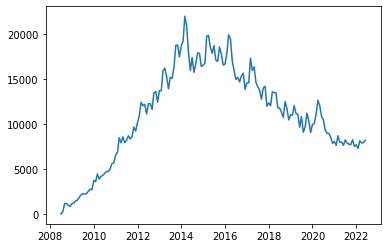

In [53]:
plt.plot(reshaped_df.index, reshaped_df['java'])

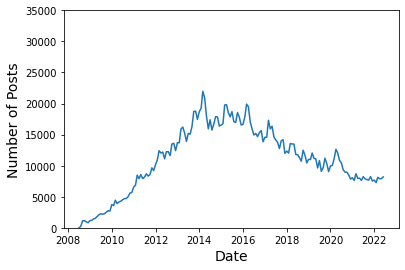

In [55]:
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Posts', fontsize=14)
    plt.ylim(0, 35000)
    plt.plot(reshaped_df.index, reshaped_df['java'])

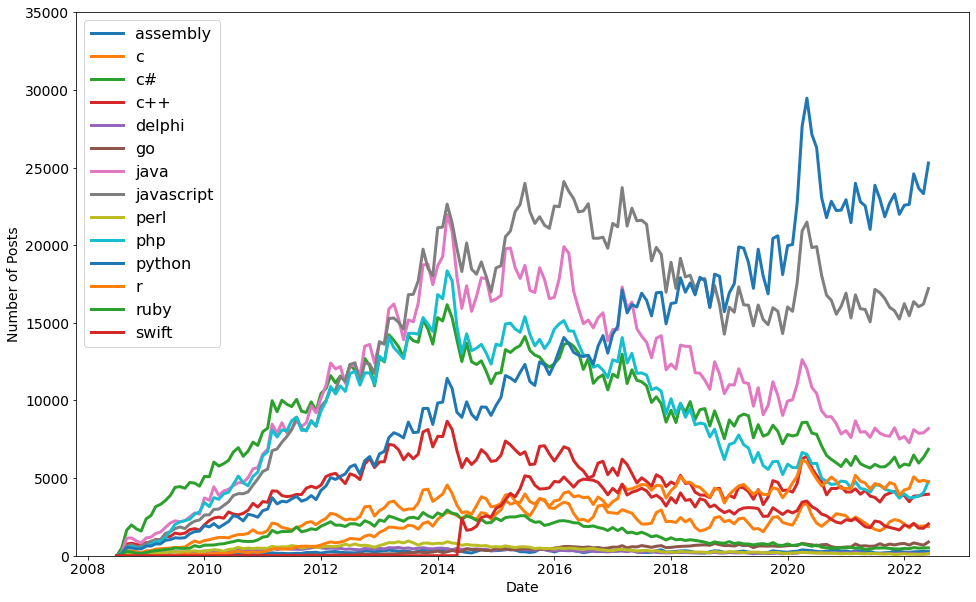

In [57]:
    plt.figure(figsize=(16,10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Posts', fontsize=14)
    plt.ylim(0, 35000)
     
    for column in reshaped_df.columns:
        plt.plot(reshaped_df.index, reshaped_df[column], 
                 linewidth=3, label=reshaped_df[column].name)
     
    plt.legend(fontsize=16) 

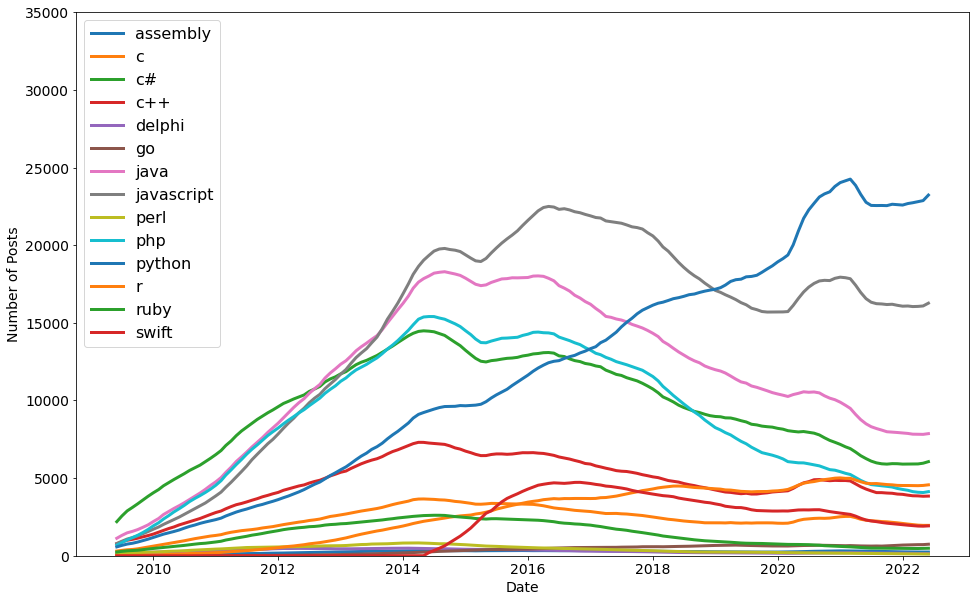

In [59]:
    # The window is number of observations that are averaged
    roll_df = reshaped_df.rolling(window=6).mean()
     
    plt.figure(figsize=(16,10))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Posts', fontsize=14)
    plt.ylim(0, 35000)
     
    # plot the roll_df instead
    for column in roll_df.columns:
        plt.plot(roll_df.index, roll_df[column], 
                 linewidth=3, label=roll_df[column].name)
     
    plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 